# Introduction


=================================================

# Milestone 1

* Nama  : M.Gifhari Heryndra
* Batch : HCK-015

Ingin menyelesaikan milestone 1 dan menguji pepembelajaran selama phase 0.

=================================================


#### **Sebuah toko jam ingin mencoba memasiki lini jam tangan mewah tapi masih tidak tau faktor apa yg akan mempengaruhi harga jam tangan tersebut .saya sebagai data analis ingin menulusuri lebih lanjut faktor apa saja yg menjadi pertimbangan dengan memanfaat dataset yg ada.**

* specific: Menetukan atribut apa saja yg mempengaruhi harga
* measurable: memiliki trial penjualan 100 item 
* achiveable: mencari atribut siknifikan untuk keputusan pembelian
* relevant: Memanfaat kan atribut apa saja yg bisa mendapatkan potential customer
time:1 bulan




* Untuk menganalisa atribut apa saja yg mempengaruhi harga dari dataset tersebet guna untuk menentukan atribut apa saja yg berpengaruh guna untuk mendpatkan potential customer 

PERTANYAAN

* atribut apa saja yg mempunyai hubungan dengan harga?
* Menentukan spesifikasi jam apa untuk di jual
* Apakah spesifikasi jam mempengaruhi harga?
* Apakah brand itu penting?

### Dataset


Dataset ini berisi informasi tentang model jam tangan mewah dari berbagai merek, termasuk harga, bahan casing dan tali, jenis movement, tingkat ketahanan air, dan detail tambahan seperti diameter casing, ketebalan casing, lebar tali, warna dial, material kristal, komplikasi, dan cadangan daya. Data ini berguna bagi individu yang tertarik pada jam tangan mewah, termasuk kolektor, penggemar, dan pengecer jam tangan.[Kaggle](https://www.kaggle.com/datasets/rkiattisak/luxury-watches-price-dataset/data).
keterangan di kolom tersebut bisa membantu user untuk memahami:

| Feature                 | Description                                                                                                                                                    |
| ----------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Brand                   | The brand of the watch.                                                                                                    |
| Model                  | The model name or number of the watch.                                                                                       |
| Case Material           | The material used to make the watch case                                                                                                                                     |
| Strap Material           | The material used to make the watch strap or bracelet                                                      |
| Movement Type                  | The type of movement used in the watch                                                                                                                                        |
| Water Resistance            | The level of water resistance for the watch |
| Case Diameter              | The diameter of the watch case in millimeters                                                                                                                                     |
| Case Thickness                | The width of the watch strap or bracelet in millimeters                                                                                                                       |
| Band Width                     | The width of the watch strap or bracelet in millimeters                                                                                                                                |
| Dial Color                   | The color of the watch dial                                                                                                                                      |


#### Berikut link visualisasi Tableau
[Tableau public](https://public.tableau.com/app/profile/gifhari.heryndra/viz/Milestone1HCK015Gifhari/Milestone1?publish=yes).

# Data loading

In [6]:
import pandas as pd
import psycopg2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway


In [7]:
db_user = "postgres"
db_password = "22d56f14" #Use your own password
db_host = "localhost"  # Usually "localhost" if running locally
db_port = "5432"  # Default is 5432

connection = psycopg2.connect(
    user=db_user,
    password=db_password,
    host=db_host,
    port=db_port
)

cursor = connection.cursor()

connection = psycopg2.connect(
    user=db_user,
    password=db_password,
    host=db_host,
    port=db_port,
    database="m1"
)


In [8]:
select_query = '''
SELECT * 
from Luxury_watch;
'''

watch = pd.read_sql_query(select_query, connection)
watch.head(10)


C:\Users\User\AppData\Local\Temp\ipykernel_6632\106636967.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  watch = pd.read_sql_query(select_query, connection)


,brand,model,case_material,strap_material,movement_type,water_resistance,case_diameter,case_thickness,band_width,dial_color,crystal_material,complications,power_reserve,price
0,Rolex,Submariner,Stainless Steel,Stainless Steel,Automatic,300 meters,40.0,13.00,20.0,Black,Sapphire,Date,48 hours,"9,500"
1,Omega,Seamaster,Titanium,Rubber,Automatic,600 meters,43.5,14.47,21.0,Blue,Sapphire,Date,60 hours,"5,800"
2,Tag Heuer,Carrera,Stainless Steel,Leather,Automatic,100 meters,41.0,13.00,20.0,White,Sapphire,Chronograph,42 hours,"4,200"
3,Breitling,Navitimer,Stainless Steel,Stainless Steel,Automatic,30 meters,43.0,14.25,22.0,Black,Sapphire,Chronograph,70 hours,"7,900"
4,Cartier,Tank Solo,Stainless Steel,Leather,Quartz,30 meters,31.0,6.05,20.0,Silver,Sapphire,None,N/A,"2,800"
5,Jaeger-LeCoultre,Reverso,Stainless Steel,Leather,Manual,30 meters,42.9,9.20,20.0,Black,Sapphire,None,45 hours,"5,500"
6,Seiko,Prospex,Stainless Steel,Rubber,Automatic,200 meters,44.3,12.90,20.0,Black,Sapphire,Date,50 hours,"1,400"
7,Citizen,Promaster,Stainless Steel,Stainless Steel,Eco-Drive,200 meters,42.0,13.00,22.0,Black,Mineral,Chronograph,270 days,"1,200"
8,Tissot,Le Locle,Stainless Steel,Leather,Automatic,30 meters,39.3,9.75,19.0,White,Sapphire,Date,38 hours,650
9,Hamilton,Khaki Field,Stainless Steel,Leather,Automatic,100 meters,38.0,9.80,20.0,Black,Sapphire,None,80 hours,495


#### Terdapat ada beberapa kolom seperti brand,model,case material,strap material,movement type,water resistance, case diameter,case thickness,band width, dial color,crystal material, complications,power reserve dan price.

In [9]:
watch.describe()

,case_diameter,case_thickness,band_width
count,507.000000,507.000000,507.000000
mean,41.046154,11.588343,21.105523
std,2.535339,2.491481,1.658375
min,27.500000,5.000000,15.000000
25%,40.000000,9.800000,20.000000
50%,41.000000,12.000000,20.000000
75%,42.000000,13.300000,22.000000
max,46.500000,17.500000,28.000000


* Water Resistance: Rentang nilai water resistance berkisar antara 30 hingga 2000, dengan nilai rata-rata sekitar 122.06. Standar deviasi yang tinggi (149.74) menunjukkan bahwa data cukup tersebar.

* Case Diameter: Case diameter berkisar antara 27.5 hingga 46.5 milimeter (mm), dengan rata-rata sekitar 41.05 mm. Standar deviasi yang relatif rendah (2.53) menunjukkan bahwa data cenderung berkumpul di sekitar rata-rata.

* Case Thickness: Case thickness berkisar antara 5 hingga 17.5 mm, dengan rata-rata sekitar 11.59 mm. Standar deviasi yang cukup tinggi (2.49) menunjukkan variasi yang cukup besar dalam ketebalan case.

* Band Width: Band width berkisar antara 15 hingga 28 mm, dengan rata-rata sekitar 21.12 mm. Standar deviasi yang rendah (1.67) menunjukkan bahwa data cenderung berkumpul di sekitar rata-rata.

* Power Reserve: Power reserve berkisar antara 0 hingga 6480 jam, dengan rata-rata sekitar 80.43 jam. Standar deviasi yang tinggi (369.03) menunjukkan variasi yang cukup besar dalam power reserve.

* Price: Harga berkisar antara 495 hingga 70000 US dollar (USD), dengan rata-rata sekitar 12077.84 USD. Standar deviasi yang tinggi (10461.37) menunjukkan variasi yang cukup besar dalam harga.

* Dari deskripsi ini, kita dapat melihat distribusi dan variasi data dalam setiap atribut, yang dapat membantu dalam pemahaman karakteristik setiap atribut dalam dataset.

# Data Cleaning

In [10]:
#removing spaces from column names
watch = watch.rename(columns={'Case Material' : 'Case_Material', 
                           'Strap Material' : 'Strap_Material',
                           'Manufacturing Price' : 'Manufacturing_Price',
                           'Movement_Type' : 'Movement_Type',
                           'Water Resistance' : 'Water_Resistance',
                           'Case Diameter (mm)' : 'Case_Diameter',
                           'Case Thickness (mm)' : 'Case_Thickness',
                           'Band Width (mm)' : 'Band_Width',
                           'Dial Color' : 'Dial_Color',
                           'Crystal Material':'Crystal_Material',
                           'Power Reserve': 'Power_Reserve',
                           'Price (USD)':'Price'
                           })



In [11]:
watch['brand'].value_counts()

brand
IWC                    39
Audemars Piguet        38
Patek Philippe         33
Zenith                 30
Blancpain              29
Rolex                  27
Breguet                26
Hublot                 26
Panerai                25
Vacheron Constantin    25
Omega                  23
Girard-Perregaux       20
Cartier                19
Jaeger-LeCoultre       16
Breitling              16
Chopard                14
Tudor                  14
Tag Heuer              11
Longines               10
Ulysse Nardin          10
Montblanc               9
Piaget                  6
Jaquet Droz             5
Seiko                   5
Bell & Ross             4
Hamilton                4
Sinn                    3
Bulgari                 3
Citizen                 2
Oris                    2
Tissot                  2
Frederique Constant     2
TAG Heuer               2
A. Lange & Söhne        2
Glashütte Original      1
Bulova                  1
A. Lange & Sohne        1
Rado                    1
Baume 

In [12]:
watch.describe()

,case_diameter,case_thickness,band_width
count,507.000000,507.000000,507.000000
mean,41.046154,11.588343,21.105523
std,2.535339,2.491481,1.658375
min,27.500000,5.000000,15.000000
25%,40.000000,9.800000,20.000000
50%,41.000000,12.000000,20.000000
75%,42.000000,13.300000,22.000000
max,46.500000,17.500000,28.000000


Water Resistance: Rentang nilai water resistance berkisar antara 30 hingga 2000, dengan nilai rata-rata sekitar 122.06. Standar deviasi yang tinggi (149.74) menunjukkan bahwa data cukup tersebar.

Case Diameter: Case diameter berkisar antara 27.5 hingga 46.5 milimeter (mm), dengan rata-rata sekitar 41.05 mm. Standar deviasi yang relatif rendah (2.53) menunjukkan bahwa data cenderung berkumpul di sekitar rata-rata.

Case Thickness: Case thickness berkisar antara 5 hingga 17.5 mm, dengan rata-rata sekitar 11.59 mm. Standar deviasi yang cukup tinggi (2.49) menunjukkan variasi yang cukup besar dalam ketebalan case.

Band Width: Band width berkisar antara 15 hingga 28 mm, dengan rata-rata sekitar 21.12 mm. Standar deviasi yang rendah (1.67) menunjukkan bahwa data cenderung berkumpul di sekitar rata-rata.

Power Reserve: Power reserve berkisar antara 0 hingga 6480 jam, dengan rata-rata sekitar 80.43 jam. Standar deviasi yang tinggi (369.03) menunjukkan variasi yang cukup besar dalam power reserve.

Price: Harga berkisar antara 495 hingga 70000 US dollar (USD), dengan rata-rata sekitar 12077.84 USD. Standar deviasi yang tinggi (10461.37) menunjukkan variasi yang cukup besar dalam harga.

In [15]:
# mengganti tipe data price menjadi float yg tadinya object.
# watch['price'] = watch['price'].str.replace(',','')
watch['price'] = watch['price'].astype(float)
# mengganti tipe data menjadi float dan mengreplace kata meters
watch['water_resistance'] = watch['water_resistance'].str.replace('meters', '').astype(float)
# mengganti tipe data power reserve menjadi float dan menghapus karaketer untuk menjadi full angka
watch['power_reserve'] = watch['power_reserve'].replace('N/A', '0')
watch['power_reserve'] = watch['power_reserve'].str.replace('hours', '')
watch['power_reserve'] = watch['power_reserve'].str.replace('days', '')
watch['power_reserve'] = watch['power_reserve'].str.replace('210', '5040').str.replace('270', '6480')
# watch['power_reserve'] = watch['power_reserve'].astype(float)
# mengdrop salah satu merk karena terjadi duplikasi
watch = watch[watch['brand'] != 'A. Lange & Sohne']
watch.reset_index(drop=True, inplace=True)
# melihat data yg duplicate dan langsung mengdrop dan menghapus isi yg data null
watch.duplicated().sum()
watch.drop_duplicates(inplace=True)
watch.dropna(inplace=True)

# meng recheck terjadi masalah karena ada kata days dan diganti ke angka
ketahanan = watch[watch['power_reserve'].str.contains('days') & watch['power_reserve'].str.contains('210')]

print(ketahanan)

jam_270_days = watch[watch['power_reserve'].str.contains('days') & watch['power_reserve'].str.contains('270')]

print(jam_270_days)

AttributeError: Can only use .str accessor with string values!

#### Mengganti tipe data yg seharusnya seperti price, setleha itu menghapus kata meters di water resistance.di kolom power reserve menjadi float agar bisa di analisa dan di uji. setelah itu mengecek ada yg duplikat tau tidak dan manghapus yg null

# Calculation and Analysis

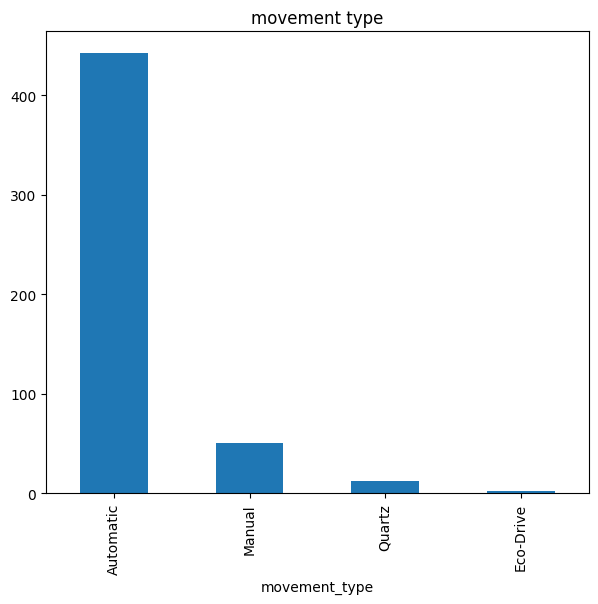

In [16]:
movement_type_ser = watch['movement_type'].value_counts().plot(kind='bar', figsize=(7, 6)).set_title("movement type")

#### Automatic movement menjadi pilihan terbaik untuk para brand jam tangan

C:\Users\User\AppData\Local\Temp\ipykernel_6632\1791398507.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='viridis')


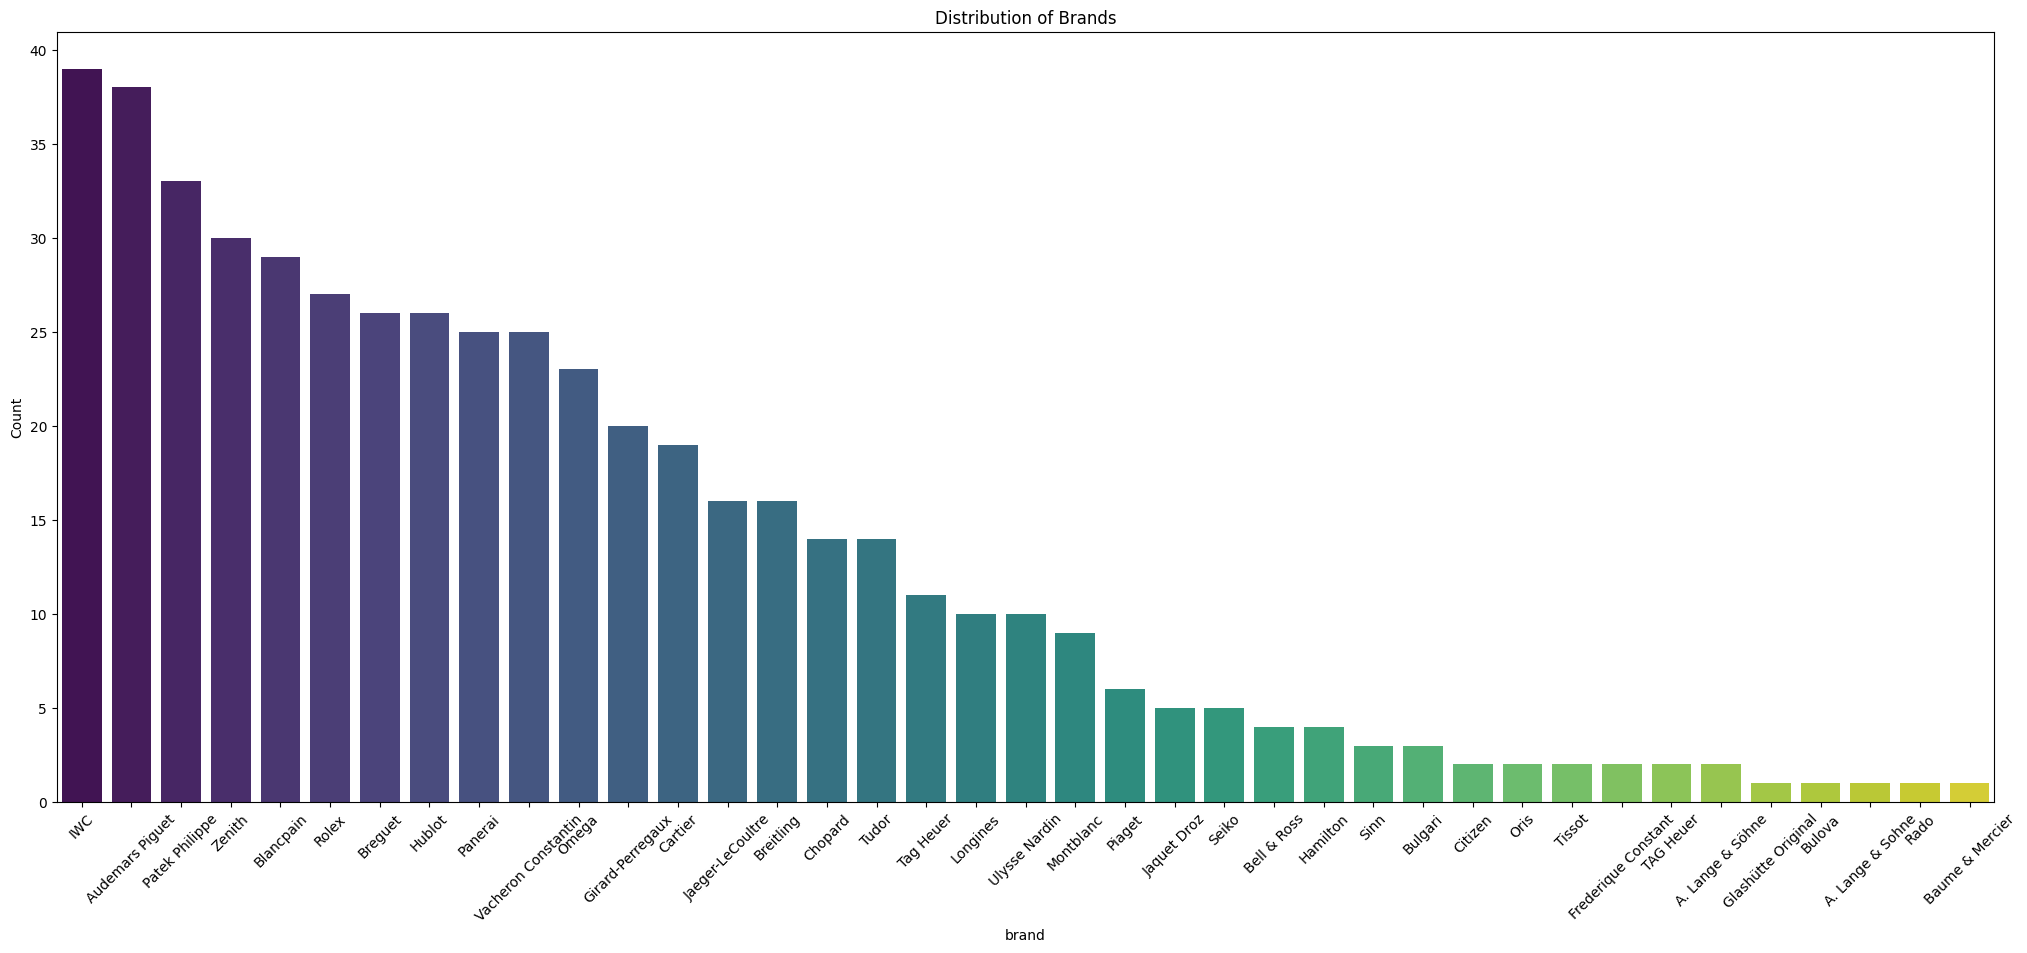

In [17]:
brand_counts = watch['brand'].value_counts()
plt.figure(figsize=(25, 10))
sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='viridis')
plt.title('Distribution of Brands')
plt.xlabel('brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### Terlihat dari distrbusi data diatas bahwa iwc dalah jumlah terbanyak di dataset ini

C:\Users\User\AppData\Local\Temp\ipykernel_37580\1626008669.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=complications_counts.index, y=complications_counts.values, palette='pastel')


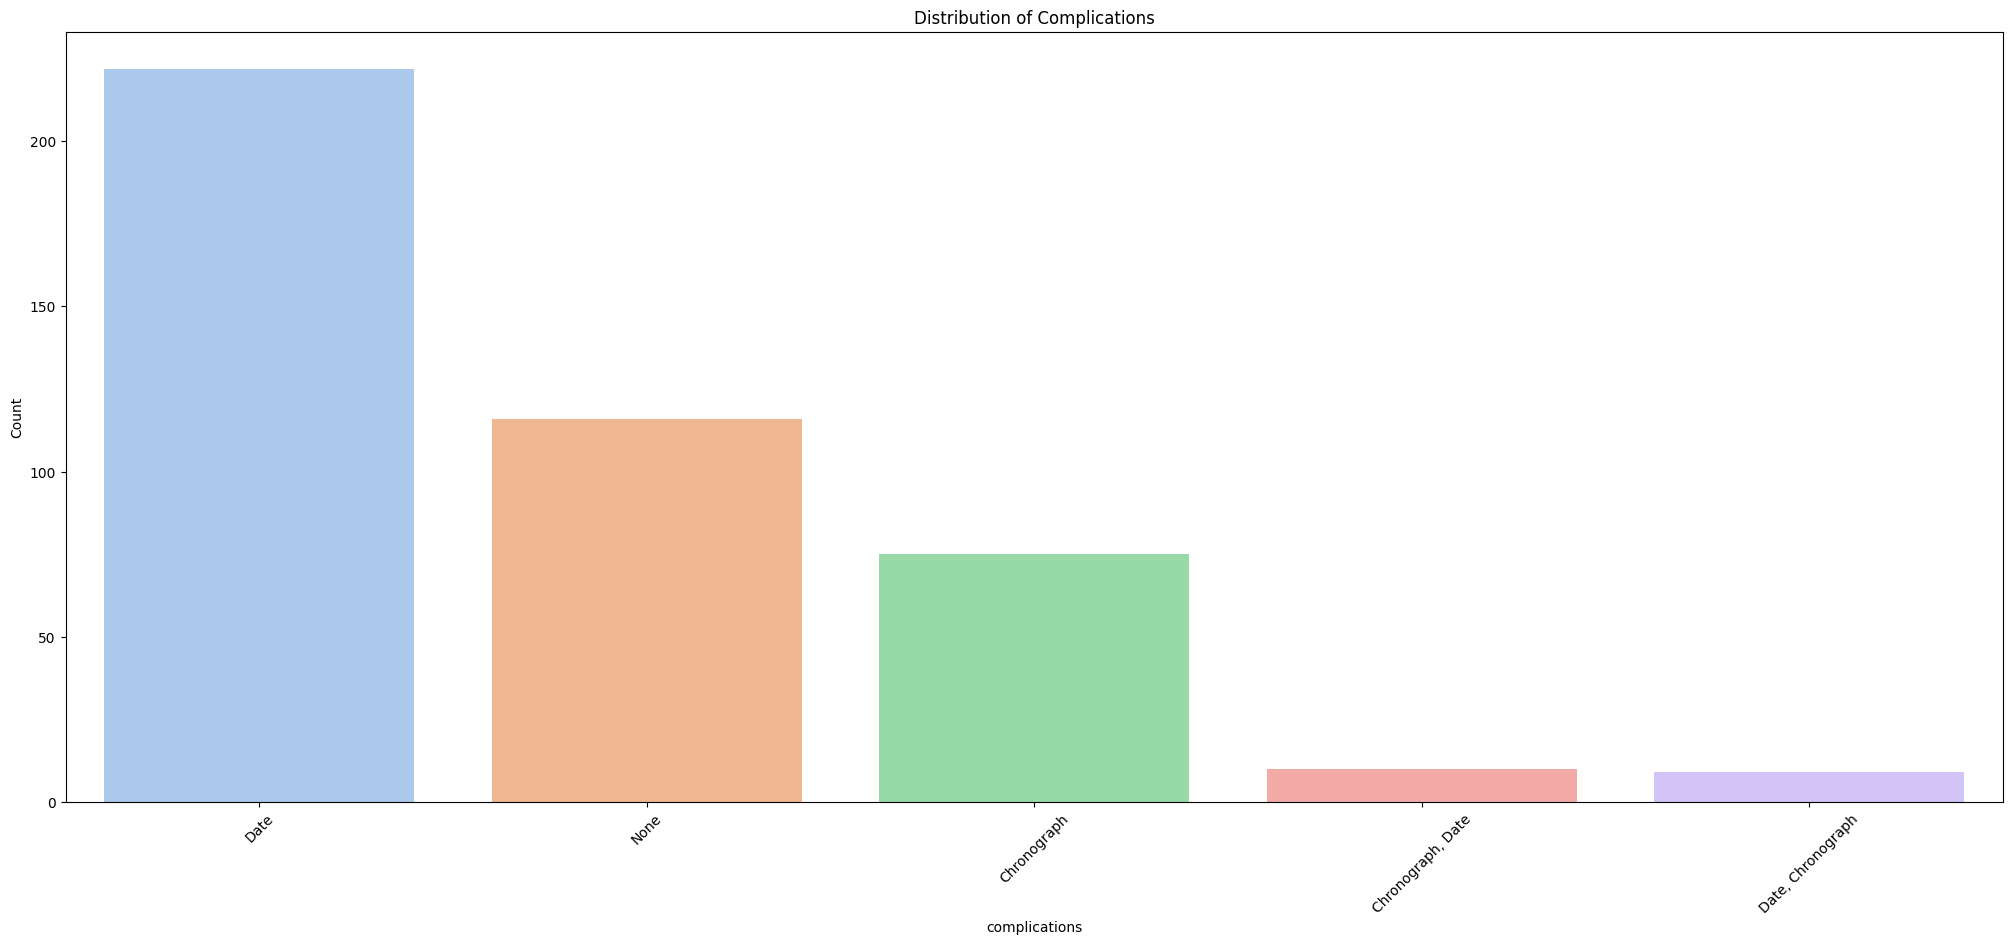

In [ ]:
complications_counts = watch['complications'].value_counts().head(5)
plt.figure(figsize=(25, 10))
sns.barplot(x=complications_counts.index, y=complications_counts.values, palette='pastel')
plt.title('Distribution of Complications')
plt.xlabel('complications')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### Terlihat bahwa ada beberapa jenis complications tetapi saya hanya menghighlight 5 untuk melihat jumlah data complications dan date menjadi yg terbanyak

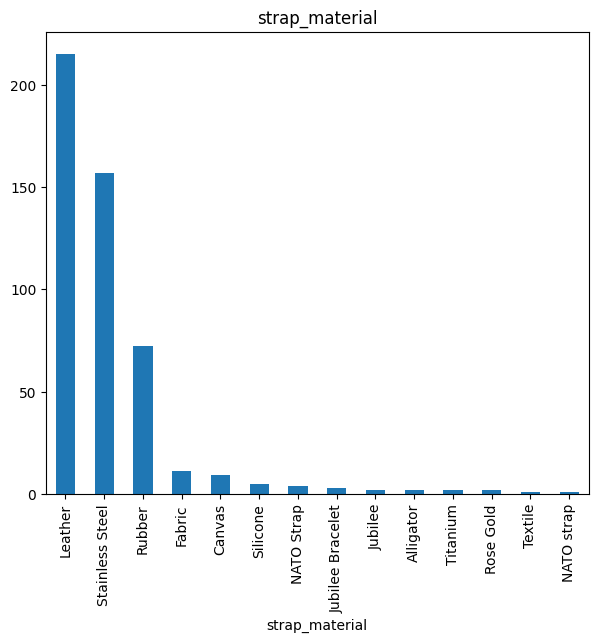

In [ ]:
strap_material_ser = watch['strap_material'].value_counts().plot(kind='bar', figsize=(7, 6)).set_title("strap_material")

#### Disini bisa di lihat bahwa ada beberapa bahan material untuk tali jam tangan dan leather menjadi yg terfavorit di varian luxury watch dan disusul oleh stainless steel

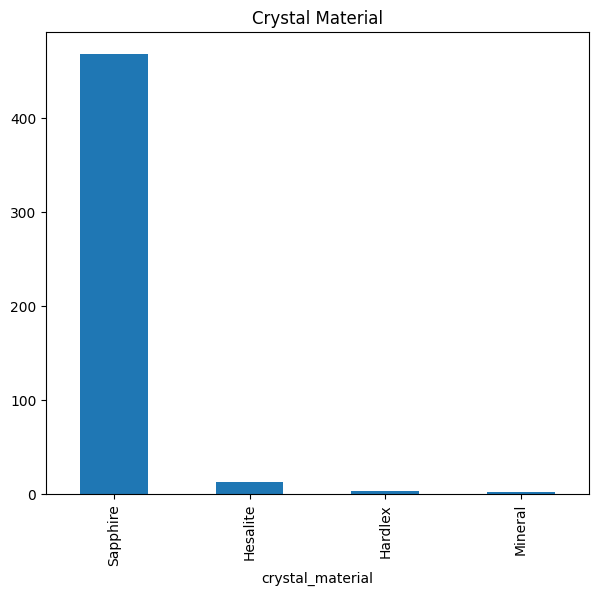

In [ ]:
crystal_material_ser = watch['crystal_material'].value_counts().plot(kind='bar', figsize=(7, 6)).set_title("Crystal Material")

#### Tipe kaca sapphire menjadi pilihan untuk para watch maker 

<Axes: ylabel='Frequency'>

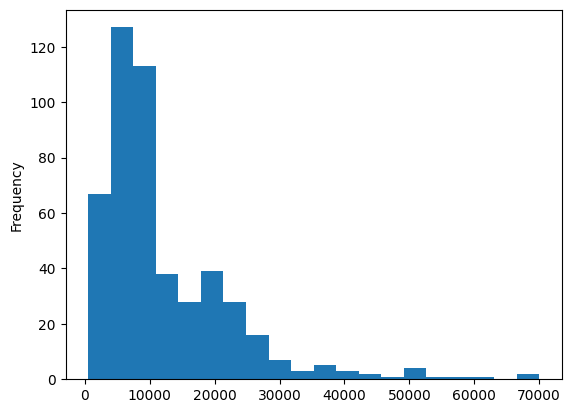

In [ ]:
watch['price'].plot(kind='hist',bins=20)

#### Dari histogram dapa dilihat bahwa frequency di dominasi di angka 10000 dolar

<Axes: >

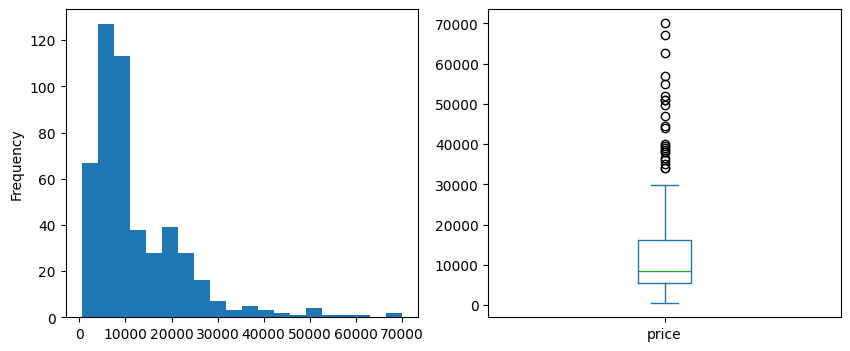

In [ ]:
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

watch['price'].plot(kind='hist',bins=20,ax=ax[0])
watch['price'].plot(kind='box',ax=ax[1])

#### Terjadi penyimpangan harga disini tapi tidak maslah di karenakan variasi yg banyak

<Axes: >

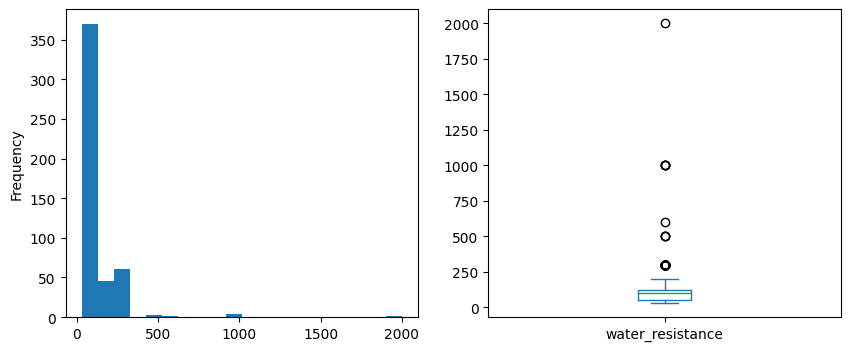

In [ ]:
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

watch['water_resistance'].plot(kind='hist',bins=20,ax=ax[0])
watch['water_resistance'].plot(kind='box',ax=ax[1])

#### Disitribusi di water resistance lebih sedikit untuk variasinya

<Axes: >

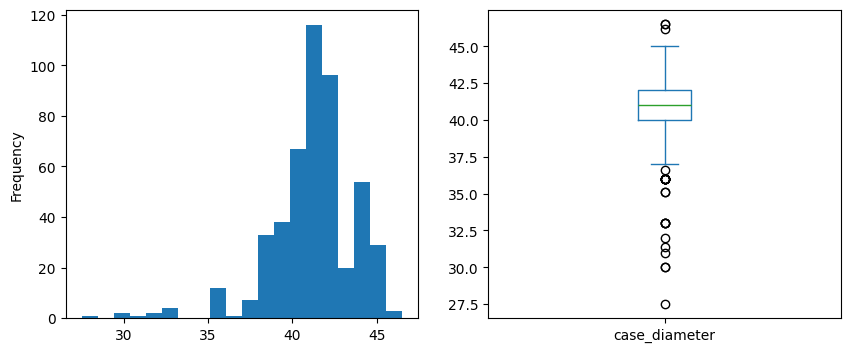

In [ ]:
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

watch['case_diameter'].plot(kind='hist',bins=20,ax=ax[0])
watch['case_diameter'].plot(kind='box',ax=ax[1])

#### Terdpat disitribusi di area 40-42.5mm untuk case diameter

<Axes: >

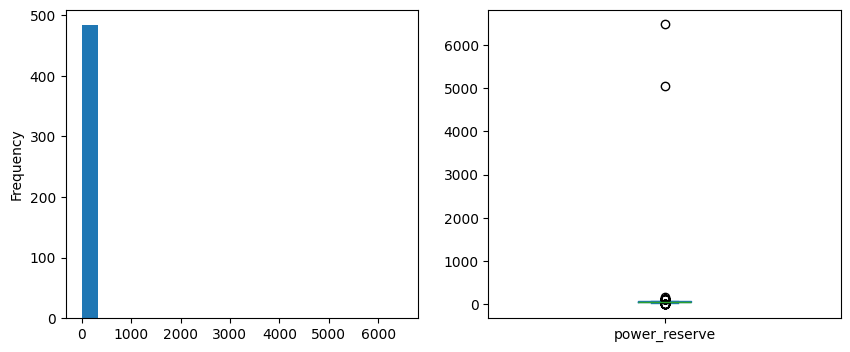

In [ ]:
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

watch['power_reserve'].plot(kind='hist',bins=20,ax=ax[0])
watch['power_reserve'].plot(kind='box',ax=ax[1])

#### untuk power reserve memiliki distirbusi yg cukup normal

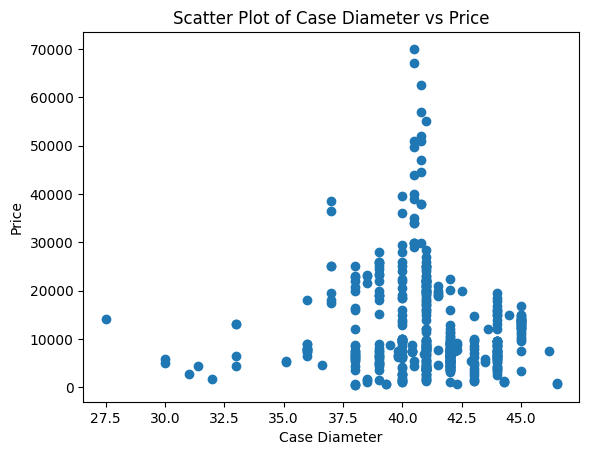

In [ ]:

# Misalnya, Anda ingin membuat scatter plot antara case_diameter dan price
plt.scatter(watch['case_diameter'], watch['price'])
plt.title('Scatter Plot of Case Diameter vs Price')
plt.xlabel('Case Diameter')
plt.ylabel('Price')
plt.show()


#### Terdapat adanya distribusi diribusi di area case diaeter 40mm - 42.5 mm

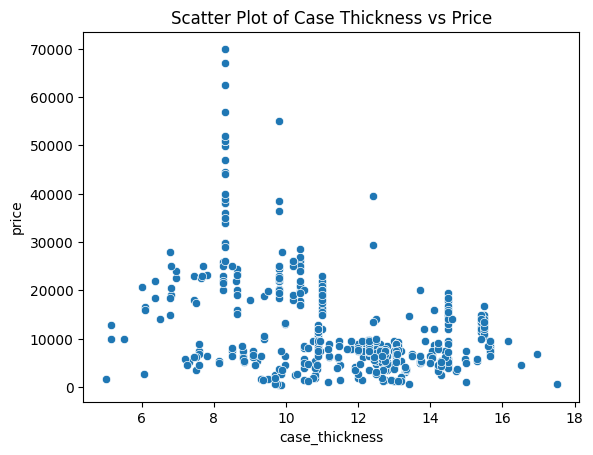

In [ ]:
# Misalnya, Anda ingin membuat scatter plot antara case_thickness dan price
sns.scatterplot(x='case_thickness', y='price', data=watch)
plt.title('Scatter Plot of Case Thickness vs Price')
plt.show()


#### Terdapat banyaknya variasi case thickness karena penyebaran data yg bervariasi

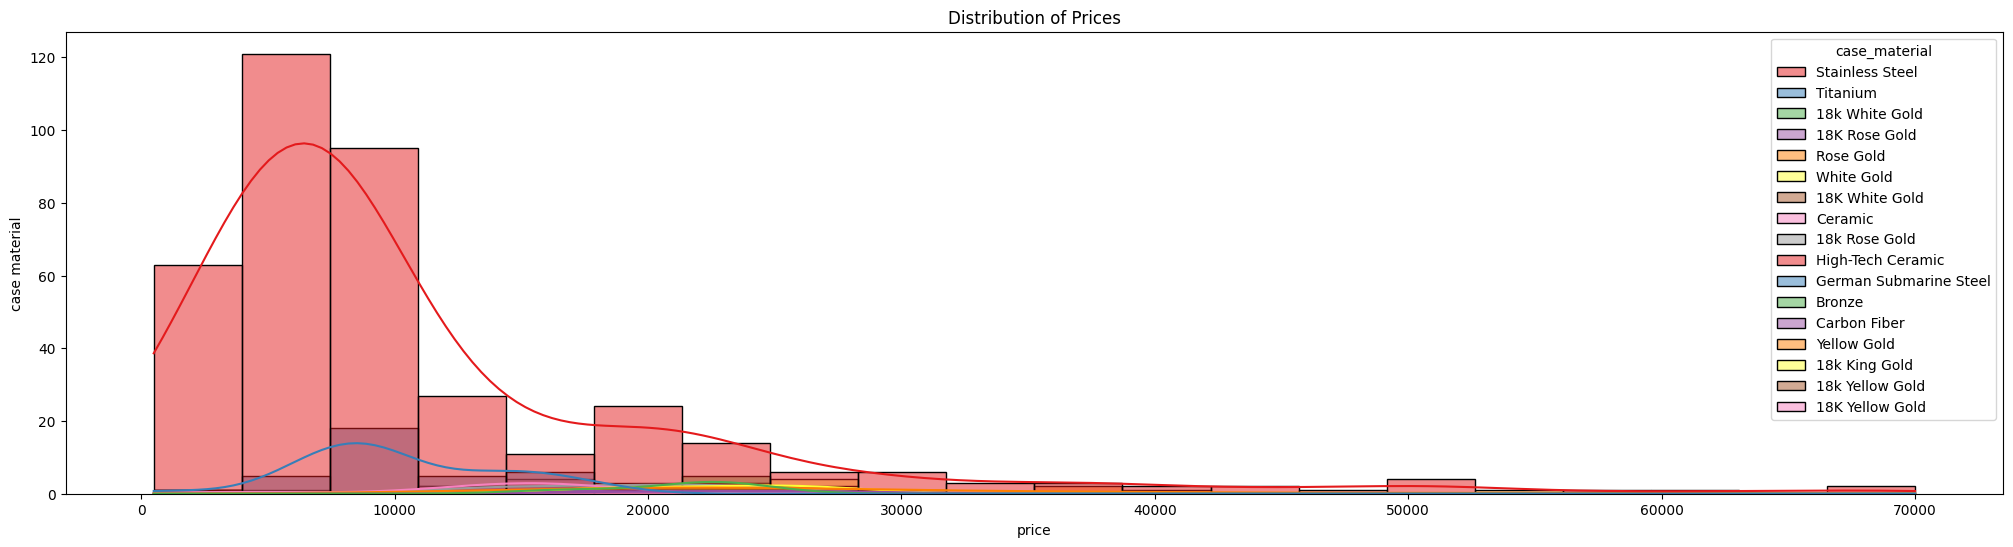

In [ ]:
plt.figure(figsize=(25, 6))
sns.histplot(data=watch, x='price', hue='case_material', bins=20, kde=True, palette='Set1')
plt.title('Distribution of Prices')
plt.xlabel('price')
plt.ylabel('case material')
plt.show()

#### berdasarkan data di atas stainless steel menjadi material utam untuk diranah jam tangan mewah dengan berbagai rentang harga

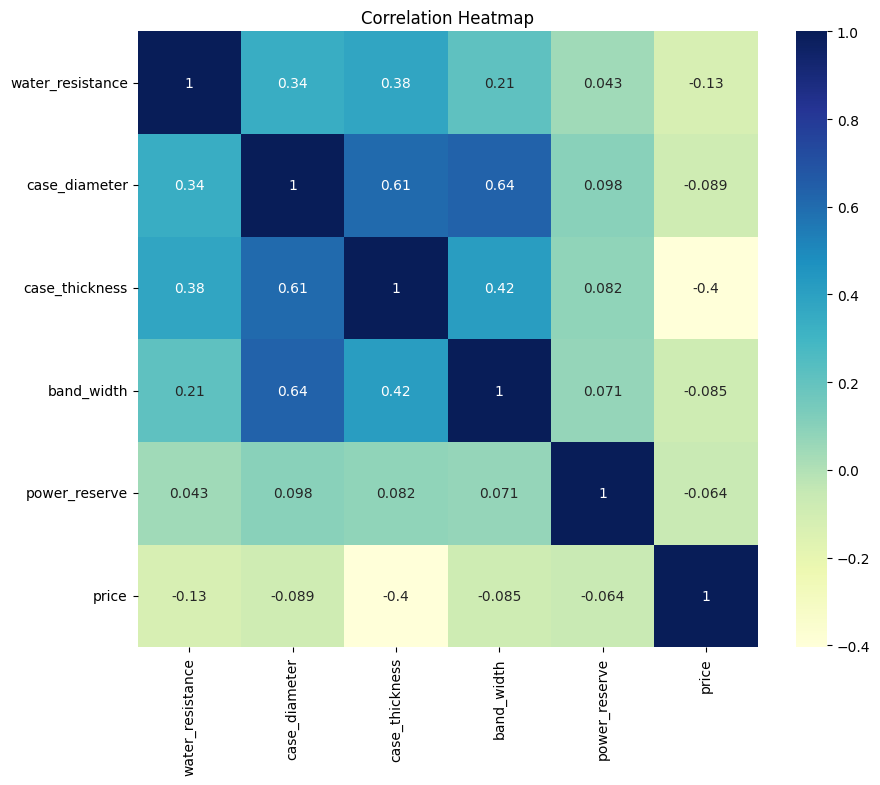

In [ ]:
angka = watch.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 8))  
sns.heatmap(angka.corr(), annot=True, cmap='YlGnBu') 
plt.title('Correlation Heatmap')  
plt.show()

#### Terlohat dai heat map menunjukan juka adanya korelasi memiliki angka 1 atau warna yg cenderung lebih gelap.sebagai contoh case thickness memiliki hubungan yg lumayn erat dengan case diameter

<Axes: xlabel='water_resistance', ylabel='price'>

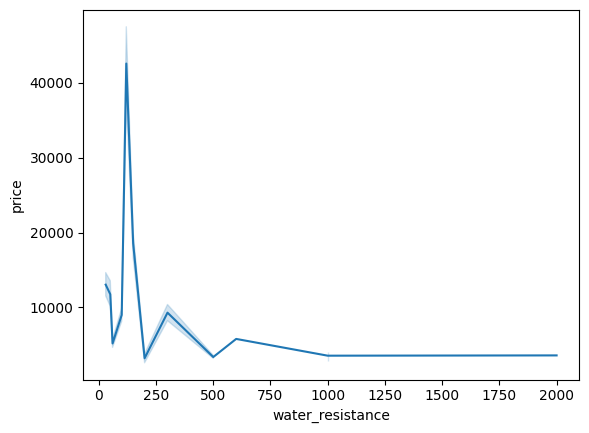

In [ ]:
sns.lineplot(x='water_resistance',y='price',data=watch)

#### Di rentang harga 40000$ mempunyai tingkat ketahanan air di kisaran 250 m

<Axes: xlabel='price', ylabel='power_reserve'>

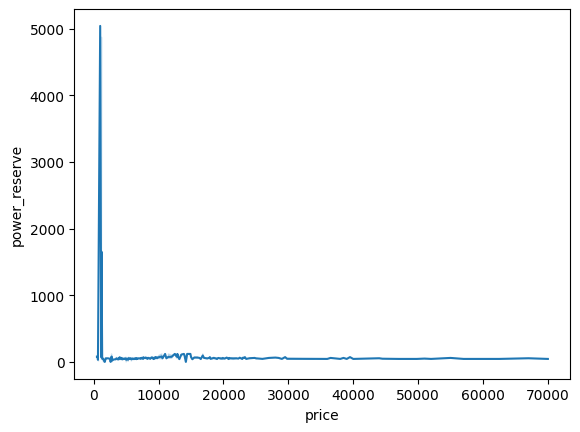

In [ ]:
sns.lineplot(x='price',y='power_reserve',data=watch)

#### Terlihat ada penyimpangan harga di power reserve karena eco drive type mempunyai waktu yg sangat lama di bandingkan movement yg lain

In [ ]:
power_reservedata = watch[(~watch['power_reserve'].isna()) & (watch['movement_type'] == 'Automatic')].groupby('brand').aggregate({'power_reserve': ['max', 'min']})
power_reservedata.sort_values(('power_reserve', 'max'), ascending=False)

power_reserve       
                              max    min
brand                                   
IWC                         168.0   42.0
Blancpain                   120.0  120.0
Baume & Mercier             120.0  120.0
Hamilton                     80.0   80.0
Rolex                        72.0   48.0
Panerai                      72.0   50.0
Hublot                       72.0   42.0
Breitling                    70.0   38.0
Tudor                        70.0   70.0
Jaeger-LeCoultre             70.0   38.0
Jaquet Droz                  68.0   68.0
Breguet                      65.0   38.0
Longines                     64.0   42.0
Vacheron Constantin          60.0   40.0
Ulysse Nardin                60.0   60.0
Omega                        60.0   48.0
Audemars Piguet              60.0   40.0
Bulgari                      60.0   55.0
Patek Philippe               55.0   45.0
Girard-Perregaux             54.0   46.0
Seiko                        50.0   41.0
Piaget                       50.0   44.0
Zenith                       50.0   50.0
Chopard                      48.0   42.0
Montblanc                    42.0   38.0
Sinn                         42.0   38.0
TAG Heuer                    42.0   38.0
Tag Heuer                    42.0   38.0
Cartier                      42.0   42.0
Bell & Ross                  42.0   40.0
Glashütte Original           40.0   40.0
Frederique Constant          38.0   38.0
Tissot                       38.0   38.0
Oris                         38.0   38.0

#### Terlihat bahwa IWC memiliki power reserve yg than lama di bandingkan brand lain di sektor mesin automatic

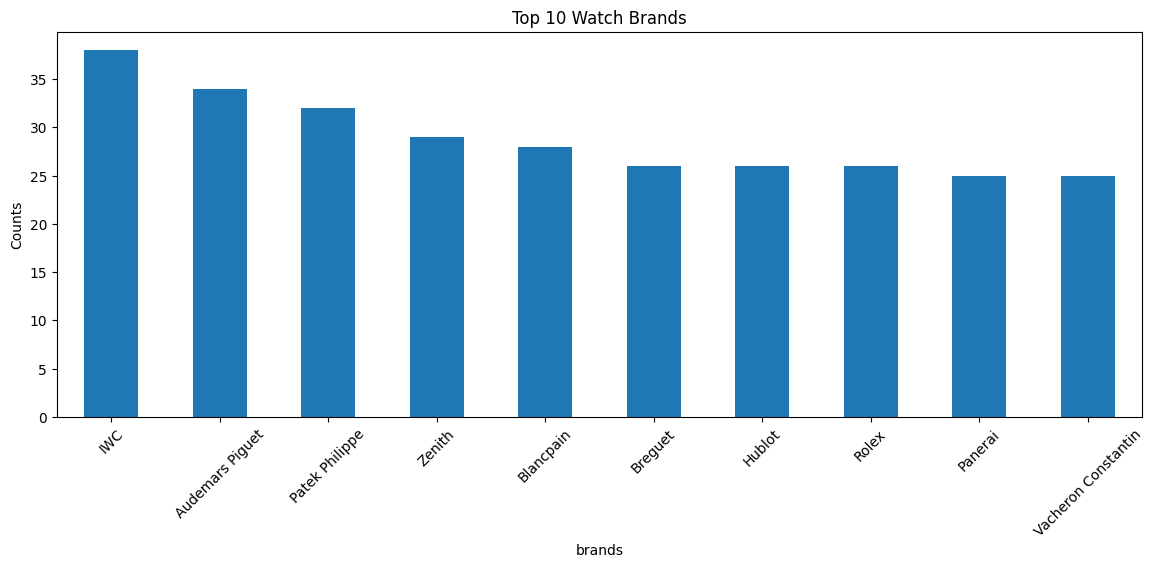

In [ ]:
watch_brands_10 = watch.sort_values(by=['brand'])['brand'].value_counts()[:10]
plt.figure(figsize=(14,5))
watch_brands_10.plot(kind='bar',xlabel='brands',ylabel='Counts')
plt.title('Top 10 Watch Brands')
plt.xticks(rotation=45);

C:\Users\User\AppData\Local\Temp\ipykernel_37580\1622835606.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=watch.sort_values('price', ascending=False), x='price', y='brand', palette='viridis', orient='h', edgecolor='none')


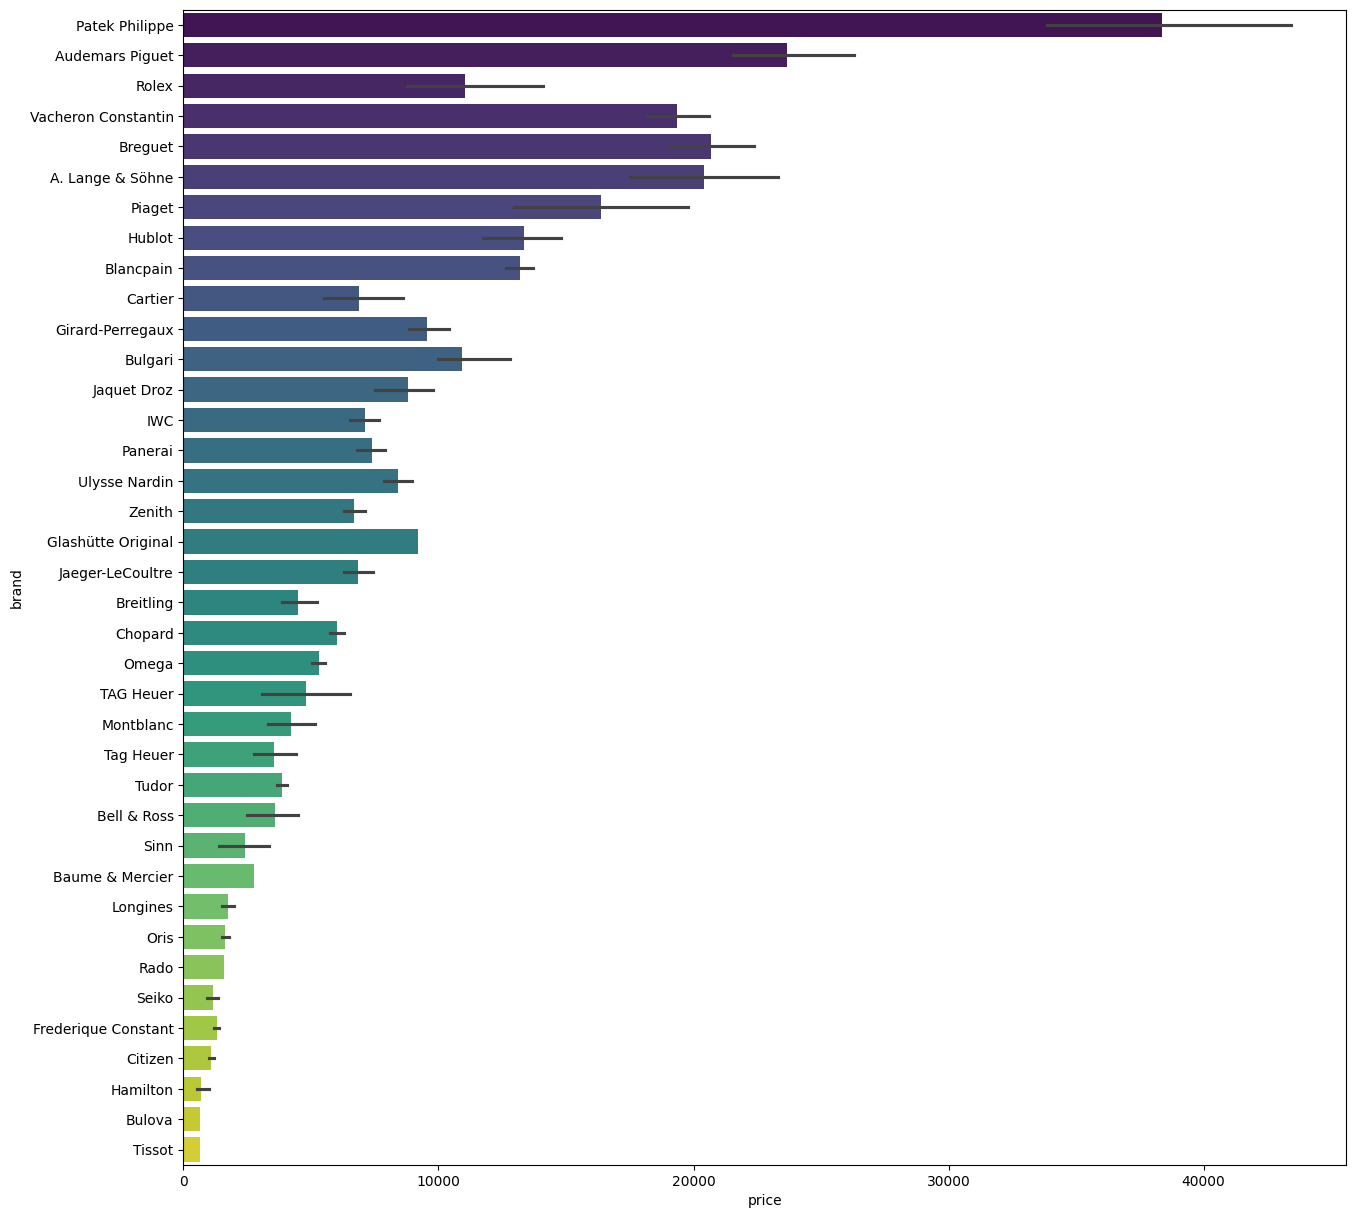

In [ ]:
plt.figure(figsize=(15,15))
sns.barplot(data=watch.sort_values('price', ascending=False), x='price', y='brand', palette='viridis', orient='h', edgecolor='none')
plt.show()


#### Menunjukan harga di setiap brand, terlihat bahwa pathek phillippe 

In [ ]:
q1 = watch['band_width'].quantile(0.25)
q3 = watch['band_width'].quantile(0.75)
iqr = q3-q1

up_bound = q3 + 1.5*iqr
low_bound = q1 - 1.5*iqr

print(f'Upper Boundary: {up_bound:.2f}' )
print(f'Lower Boundary: {low_bound:.2f}')

outlier = watch['band_width'][(watch['band_width']<low_bound) | (watch['band_width']>up_bound)]
no_outlier = watch['band_width'][(watch['band_width']>=low_bound) & (watch['band_width']<=up_bound)]

print(f'Percentage of outliers: {len(outlier)*100/len(watch["band_width"]):.2f}%%')

Upper Boundary: 25.00
Lower Boundary: 17.00
Percentage of outliers: 1.85%%


In [ ]:
q1 = watch['power_reserve'].quantile(0.25)
q3 = watch['power_reserve'].quantile(0.75)
iqr = q3-q1

up_bound = q3 + 1.5*iqr
low_bound = q1 - 1.5*iqr

print(f'Upper Boundary: {up_bound:.2f}' )
print(f'Lower Boundary: {low_bound:.2f}')

outlier = watch['power_reserve'][(watch['power_reserve']<low_bound) | (watch['power_reserve']>up_bound)]
no_outlier = watch['power_reserve'][(watch['power_reserve']>=low_bound) & (watch['power_reserve']<=up_bound)]

print(f'Percentage of outliers: {len(outlier)*100/len(watch["power_reserve"]):.2f}%%')

Upper Boundary: 104.00
Lower Boundary: 8.00
Percentage of outliers: 9.26%%


In [ ]:
q1 = watch['price'].quantile(0.25)
q3 = watch['price'].quantile(0.75)
iqr = q3-q1

up_bound = q3 + 1.5*iqr
low_bound = q1 - 1.5*iqr

print(f'Upper Boundary: {up_bound:.2f}' )
print(f'Lower Boundary: {low_bound:.2f}')

outlier = watch['price'][(watch['price']<low_bound) | (watch['price']>up_bound)]
no_outlier = watch['price'][(watch['price']>=low_bound) & (watch['price']<=up_bound)]

print(f'Percentage of outliers: {len(outlier)*100/len(watch["price"]):.2f}%%')

Upper Boundary: 32312.50
Lower Boundary: -10587.50
Percentage of outliers: 4.73%%


In [ ]:
q1 = watch['case_diameter'].quantile(0.25)
q3 = watch['case_diameter'].quantile(0.75)
iqr = q3-q1

up_bound = q3 + 1.5*iqr
low_bound = q1 - 1.5*iqr

print(f'Upper Boundary: {up_bound:.2f}' )
print(f'Lower Boundary: {low_bound:.2f}')

outlier = watch['case_diameter'][(watch['case_diameter']<low_bound) | (watch['case_diameter']>up_bound)]
no_outlier = watch['case_diameter'][(watch['case_diameter']>=low_bound) & (watch['case_diameter']<=up_bound)]

print(f'Percentage of outliers: {len(outlier)*100/len(watch["case_diameter"]):.2f}%%')

Upper Boundary: 45.00
Lower Boundary: 37.00
Percentage of outliers: 5.35%%


In [ ]:
q1 = watch['case_thickness'].quantile(0.25)
q3 = watch['case_thickness'].quantile(0.75)
iqr = q3-q1

up_bound = q3 + 1.5*iqr
low_bound = q1 - 1.5*iqr

print(f'Upper Boundary: {up_bound:.2f}' )
print(f'Lower Boundary: {low_bound:.2f}')

outlier = watch['case_thickness'][(watch['case_thickness']<low_bound) | (watch['case_thickness']>up_bound)]
no_outlier = watch['case_thickness'][(watch['case_thickness']>=low_bound) & (watch['case_thickness']<=up_bound)]

print(f'Percentage of outliers: {len(outlier)*100/len(watch["case_thickness"]):.2f}%%')

Upper Boundary: 18.55
Lower Boundary: 4.55
Percentage of outliers: 0.00%%


In [ ]:
q1 = watch['water_resistance'].quantile(0.25)
q3 = watch['water_resistance'].quantile(0.75)
iqr = q3-q1

up_bound = q3 + 1.5*iqr
low_bound = q1 - 1.5*iqr

print(f'Upper Boundary: {up_bound:.2f}' )
print(f'Lower Boundary: {low_bound:.2f}')

outlier = watch['water_resistance'][(watch['water_resistance']<low_bound) | (watch['water_resistance']>up_bound)]
no_outlier = watch['water_resistance'][(watch['water_resistance']>=low_bound) & (watch['water_resistance']<=up_bound)]

print(f'Percentage of outliers: {len(outlier)*100/len(watch["water_resistance"]):.2f}%%')

Upper Boundary: 225.00
Lower Boundary: -55.00
Percentage of outliers: 14.40%%


#### Disini terlihat mencek adanya adanya outlier di setiap variable karena banyak variasi di spesifikasi jam tangan yg berbeda di setiap brand tetapi tidak masalah karena tujuan untuk menganalisa series apa yg mempangaruhi jam tangan mewah

#### **Untuk menguji korelasi antara 2 variable numerik maka melakukan uji spearman dan uji pearson untuk mengetahui ada korelasi atau tidak untuk harga dan atribut numerikal** 

In [ ]:
numeric_attributes = ['case_diameter', 'case_thickness', 'band_width', 'power_reserve','water_resistance']

pearson_diameter = stats.pearsonr(watch['case_diameter'], watch['price'])
spearman_diameter = stats.spearmanr(watch['case_diameter'], watch['price'])

pearson_thickness = stats.pearsonr(watch['case_thickness'], watch['price'])
spearman_thickness = stats.spearmanr(watch['case_thickness'], watch['price'])

pearson_band = stats.pearsonr(watch['band_width'], watch['price'])
spearman_band = stats.spearmanr(watch['band_width'], watch['price'])

pearson_power = stats.pearsonr(watch['power_reserve'], watch['price'])
spearman_power = stats.spearmanr(watch['power_reserve'], watch['price'])

pearson_water = stats.pearsonr(watch['water_resistance'], watch['price'])
spearman_water = stats.spearmanr(watch['water_resistance'], watch['price'])

print("Correlation between Case Diameter and Price:")
print("Pearson correlation:", pearson_diameter)
print("Pearson p-value:", pearson_diameter)
print("Spearman correlation:", spearman_diameter.correlation)
print("Spearman p-value:", spearman_diameter.pvalue)

print("\nCorrelation between Case Thickness and Price:")
print("Pearson correlation:", pearson_thickness)
print("Pearson p-value:", pearson_thickness)
print("Spearman correlation:", spearman_thickness.correlation)
print("Spearman p-value:", spearman_thickness.pvalue)

print("\nCorrelation between Band Width and Price:")
print("Pearson correlation:", pearson_band)
print("Pearson p-value:", pearson_band)
print("Spearman correlation:", spearman_band.correlation)
print("Spearman p-value:", spearman_band.pvalue)

print("\nCorrelation between Power Reserve and Price:")
print("Pearson correlation:", pearson_power)
print("Pearson p-value:", pearson_power)
print("Spearman correlation:", spearman_power.correlation)
print("Spearman p-value:", spearman_power.pvalue)

print("\nCorrelation between water resistance and Price:")
print("Pearson correlation:", pearson_water)
print("Pearson p-value:", pearson_water)
print("Spearman correlation:", spearman_water.correlation)
print("Spearman p-value:", spearman_water.pvalue)
                                                   


# print(f"Pearson correlation between {attr} and price: {pearson_corr}, p-value: {pearson_pval}")
# print(f"Spearman correlation between {attr} and price: {spearman_corr}, p-value: {spearman_pval}")


Correlation between Case Diameter and Price:
Pearson correlation: PearsonRResult(statistic=-0.08892747482558423, pvalue=0.050080315067844515)
Pearson p-value: PearsonRResult(statistic=-0.08892747482558423, pvalue=0.050080315067844515)
Spearman correlation: -0.11453111326882885
Spearman p-value: 0.011513894889398388

Correlation between Case Thickness and Price:
Pearson correlation: PearsonRResult(statistic=-0.40499360329787476, pvalue=1.3147132174015289e-20)
Pearson p-value: PearsonRResult(statistic=-0.40499360329787476, pvalue=1.3147132174015289e-20)
Spearman correlation: -0.31311814199483556
Spearman p-value: 1.624405496504386e-12

Correlation between Band Width and Price:
Pearson correlation: PearsonRResult(statistic=-0.08467549813897052, pvalue=0.06214636786867933)
Pearson p-value: PearsonRResult(statistic=-0.08467549813897052, pvalue=0.06214636786867933)
Spearman correlation: 0.026184817998209965
Spearman p-value: 0.564704903301442

Correlation between Power Reserve and Price:
Pea

####   Nilai diatas menggambarkan bahwa antara case diameter dan harga memiliki korelasi secara spearman  karena pvalue lebih kecil 

####   ketebalan case juga memiliki hubungan yg kuat dengan harga secara spearman atau pearson karena pvalu yg sangat kecil 

####   Berbeda dengan bandwith tidak memiliki hubungan sama sekali dengan harga karena mempunya p value cukup besar.

####   Power reserve memiliki korelasi dengan spearman karena mendakati nilai satu tetapi tidak untuk pearson

####    semakin tinggi tingkat ketahanan air, harga jam tangan cenderung lebih rendah. Hal ini dapat memiliki    implikasi penting dalam strategi penetapan harga dan pemasaran untuk jam tangan, terutama dalam pasar jam tangan mewah




### **Dalam konteks ini, ANOVA digunakan untuk menguji apakah terdapat perbedaan signifikan dalam harga jam tangan antara kolom-kolom yg categorical**

In [ ]:
categorical_attributes = ['brand']
for attr in categorical_attributes:
    groups = [watch[watch[attr] == value]['price'] for value in watch[attr].unique()]
    f_stat, p_val = f_oneway(*groups)
    print(f"ANOVA p-value for {attr}: {p_val}")


ANOVA p-value for brand: 3.170748533415205e-131


##### H0: tidak ada pengaruh significant terhadap brand dan price

##### H1: adanya pengaruh significant terhadap brand dan price

##### Memiliki P-value yg sangat kecil dan mengindikasikan bahwa h0 ditolak, bahwa adanya pengaruh significant terhadapap price dan harga.








In [ ]:
categorical_attributes = ['model']

for attr in categorical_attributes:
    groups = [watch[watch[attr] == value]['price'] for value in watch[attr].unique()]
    f_stat, p_val = f_oneway(*groups)
    print(f"ANOVA p-value for {attr}: {p_val}")



ANOVA p-value for model: 2.747006713694552e-125


##### H0: tidak ada pengaruh significant terhadap model dan price

##### H1: adanya pengaruh significant terhadap model dan price

##### Disini model memiliki pengaruh yg siginifikan terhadap harga yg mengartikan h0 ditolak dan h1 diterima






In [ ]:
categorical_attributes = ['case_material']
for attr in categorical_attributes:
    groups = [watch[watch[attr] == value]['price'] for value in watch[attr].unique()]
    f_stat, p_val = f_oneway(*groups)
    print(f"ANOVA p-value for {attr}: {p_val}")


ANOVA p-value for case_material: 2.4180233648881895e-09


##### H0: tidak ada pengaruh significant terhadap case material dan price

##### H1: adanya pengaruh significant terhadap case material dan price

##### case material menjadi salah satu hal utama untuk menentukan harga di lini luxury watch dapat dibuktikan dengan anova p value <0.05 .





In [ ]:
categorical_attributes = ['strap_material']
for attr in categorical_attributes:
    groups = [watch[watch[attr] == value]['price'] for value in watch[attr].unique()]
    f_stat, p_val = f_oneway(*groups)
    print(f"ANOVA p-value for {attr}: {p_val}")


ANOVA p-value for strap_material: 5.812206114754329e-11


##### H0: tidak ada pengaruh significant terhadap strap material dan price

##### H1: adanya pengaruh significant terhadap strap material dan price

##### strap material juga menjadi bahan pertimbangan untuk di aplikasikan di luxury watch dengan mempunyai 5.812206114754329e-11. jadi h0 ditolak dan h1 di terima yg berarti mempunyai pengaruh significant terhadap strap material dan price.





In [ ]:
categorical_attributes = ['movement_type']
for attr in categorical_attributes:
    groups = [watch[watch[attr] == value]['price'] for value in watch[attr].unique()]
    f_stat, p_val = f_oneway(*groups)
    print(f"ANOVA p-value for {attr}: {p_val}")


ANOVA p-value for movement_type: 0.008967026438268877


##### H0: tidak ada pengaruh significant terhadap movement type dan price

##### H1: adanya pengaruh significant terhadap movement type dan price

##### Dengan diterimanya h1 yg mengindikasikan bahwa mempunyai pengaruh signifant terhadap movement type dan price




In [ ]:
categorical_attributes = ['dial_color']
for attr in categorical_attributes:
    groups = [watch[watch[attr] == value]['price'] for value in watch[attr].unique()]
    f_stat, p_val = f_oneway(*groups)
    print(f"ANOVA p-value for {attr}: {p_val}")


ANOVA p-value for dial_color: 9.971050752628528e-16


##### H0: tidak ada pengaruh significant terhadap dial color dan price

##### H1: adanya pengaruh significant terhadap dial color dan price

##### Dapat di interpretasikan bahwa nilai p value Anova mempunyai nilai yg kecil yaitu kurang dari 0,05. Bahwa h0 ditolak bahwa dial color memiliki pengaruh terhadap price







In [ ]:
categorical_attributes = ['crystal_material']
for attr in categorical_attributes:
    groups = [watch[watch[attr] == value]['price'] for value in watch[attr].unique()]
    f_stat, p_val = f_oneway(*groups)
    print(f"ANOVA p-value for {attr}: {p_val}")


ANOVA p-value for crystal_material: 0.007763347872937239


##### H0: tidak ada pengaruh significant terhadap crystal material dan price

##### H1: adanya pengaruh significant terhadap crystal material dan price

##### Dapat dinyatakan bahwa ada pengaruh significant  terhadap crystal materil dan price bisa dibuktikan dengan anova dilihat bahwa nilai p value anova yg sangat kecil yg meng indikasikan h0 ditola dan h1 diterima.





In [ ]:
categorical_attributes = ['complications']
for attr in categorical_attributes:
    groups = [watch[watch[attr] == value]['price'] for value in watch[attr].unique()]
    f_stat, p_val = f_oneway(*groups)
    print(f"ANOVA p-value for {attr}: {p_val}")


ANOVA p-value for complications: 5.309076871189562e-06


##### H0 : Tidak ada perbedaan signifikan dalam complication dan price

##### H1 : Terdapat perbedaan signifikan dalam complication dan price

##### p value anova sangat kecili yg berarti h0 ditolak dan h1 diterima yg menunjukan adanya hubungan yg significant terhadap complication dan harga




# Conclusion

#### 1. Mendapatkan faktor apa saja yg dapat mempengaruhi harga jam tangan mewah

* Pada data set ini ada beberapa variable yg mempengaruhi jam tangan tersebut seperti brand,model,case diameter,tingkat power reserve,movement type,complications,dial color,strap material dan case material.
Tetapi dilihat dari perhitungan statistika bahwa Brand menjadi yg paling significant terhadap harga dan diikuti oleh model.

* Tentunya brand dan model adalah hal yg sangat berpengaruh dengan harga jam tangan mewah. 

* Brand Patek phillipe menjadi brand yg termahal di bandingkan yg lain tetapi IWC menjadi produk terfavorit berdasarkan dataset sementara ini.



#### 2. Rekomendasi 

* Toko harus mempunyai riset lebih lanjut tentang consumer behavior seperti apa yg mempunyai relasi terhadap jam tangan mewah, untuk mendapat penjualan maksimal ketika memulai penjualan.
 

* Retail toko jam harus memerhatikan detail apa saja yg di butuh kan potential customer . dari analisa tersebut mestinya retail toko jam dapat mempertimbangkan atribut apa saja guna brand apa saja yg masuk di lini jual mereka. seperti contoh brand dan model apa yg harus menjadi pertimbangan untuk penjualan pertama.

